<a href="https://colab.research.google.com/github/IhkafAmeny/HSSF_Implementation/blob/main/Hssflfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

ihkafameny_abide_dataset_path = kagglehub.dataset_download('ihkafameny/abide-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abide-dataset/abide1000/phenotypes_clean1.csv
/kaggle/input/abide-dataset/abide1000/image/50028.png
/kaggle/input/abide-dataset/abide1000/image/50738.png
/kaggle/input/abide-dataset/abide1000/image/51355.png
/kaggle/input/abide-dataset/abide1000/image/51094.png
/kaggle/input/abide-dataset/abide1000/image/50440.png
/kaggle/input/abide-dataset/abide1000/image/50499.png
/kaggle/input/abide-dataset/abide1000/image/50399.png
/kaggle/input/abide-dataset/abide1000/image/51012.png
/kaggle/input/abide-dataset/abide1000/image/50210.png
/kaggle/input/abide-dataset/abide1000/image/50658.png
/kaggle/input/abide-dataset/abide1000/image/50422.png
/kaggle/input/abide-dataset/abide1000/image/50517.png
/kaggle/input/abide-dataset/abide1000/image/51304.png
/kaggle/input/abide-dataset/abide1000/image/50572.png
/kaggle/input/abide-dataset/abide1000/image/51301.png
/kaggle/input/abide-dataset/abide1000/image/50366.png
/kaggle/input/abide-dataset/abide1000/image/50427.png
/kaggle/input/abide-da

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s] 
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 149MB/s]
Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 125MB/s]
Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:00<00:00, 214MB/s]  



 Round 1
Client 0 - Accuracy: 0.5766
Client 1 - Accuracy: 0.5315
Client 2 - Accuracy: 0.5946
Client 3 - Accuracy: 0.6667
Client 4 - Accuracy: 0.5000
Global Accuracy: 0.5739, Standard deviation: 0.0571, Max Accuracy: 0.6667, Min Accuracy: 0.5000

 Round 2
Client 0 - Accuracy: 0.9189
Client 1 - Accuracy: 0.8919
Client 2 - Accuracy: 0.9369
Client 3 - Accuracy: 0.7523
Client 4 - Accuracy: 0.5225
Global Accuracy: 0.8045, Standard deviation: 0.1552, Max Accuracy: 0.9369, Min Accuracy: 0.5225

 Round 3
Client 0 - Accuracy: 0.9414
Client 1 - Accuracy: 0.9640
Client 2 - Accuracy: 0.9685
Client 3 - Accuracy: 0.9550
Client 4 - Accuracy: 0.8468
Global Accuracy: 0.9351, Standard deviation: 0.0451, Max Accuracy: 0.9685, Min Accuracy: 0.8468

 Round 4
Client 0 - Accuracy: 0.9369
Client 1 - Accuracy: 0.9505
Client 2 - Accuracy: 0.9955
Client 3 - Accuracy: 0.9955
Client 4 - Accuracy: 0.9910
Global Accuracy: 0.9739, Standard deviation: 0.0251, Max Accuracy: 0.9955, Min Accuracy: 0.9369

 Round 5
Client

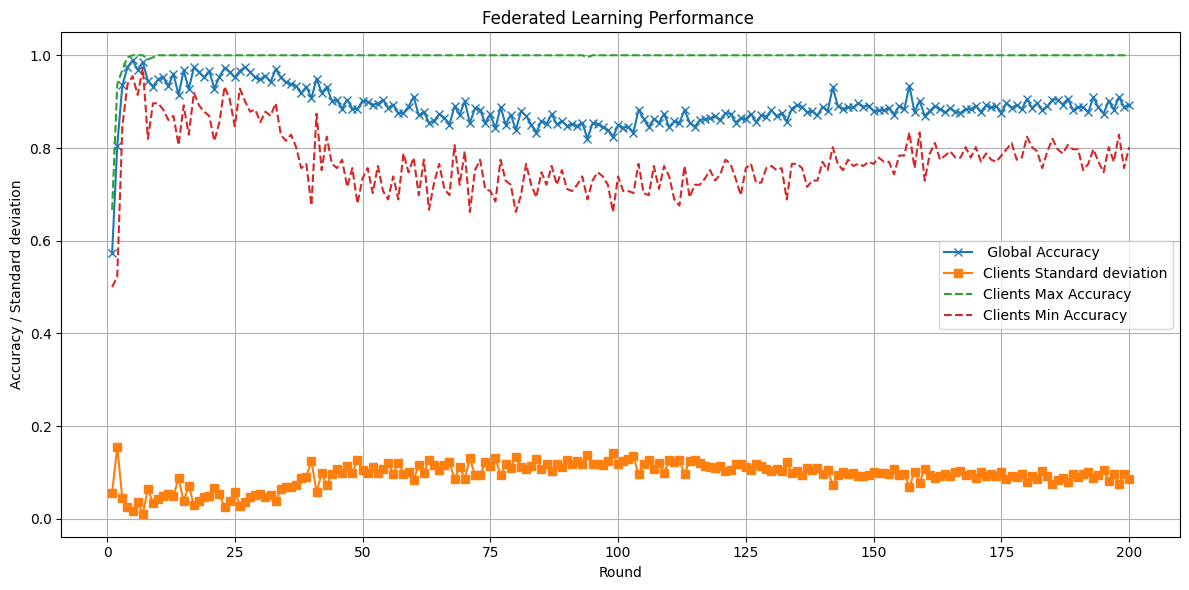


 +------------------------------------------------------------------------------------------+
|                               Final Round Metrics Summary                                |
+-------+-----------------+--------------------+---------------------+---------------------+
| Round | Global Accuracy | Standard deviation | Max client Accuracy | Min client Accuracy |
+-------+-----------------+--------------------+---------------------+---------------------+
|  200  |     0.892793    |      0.086524      |       1.000000      |       0.801802      |
+-------+-----------------+--------------------+---------------------+---------------------+


In [ ]:
CSV_PATH = '/kaggle/input/abide-dataset/abide1000/phenotypes_clean1.csv'
IMAGES_DIR = '/kaggle/input/abide-dataset/abide1000/image'
K = 5  # nombre de clients

class AbideDataset(Dataset):
    def __init__(self, csv_path, images_dir, transform=None):
        self.data = pd.read_csv(csv_path)
        self.images_dir = images_dir
        self.transform = transform
        self.label_map = {'control': 0, 'autism': 1}

        # Ajout du label numérique
        self.data['label'] = self.data['diagnosis'].map(self.label_map)

        # Nettoyage des labels manquants
        self.data = self.data.dropna(subset=['label']).reset_index(drop=True)

        # Liste des fichiers d'image existants
        available_images = set(os.listdir(images_dir))

        # Filtrage : garder uniquement les lignes dont l'image existe
        self.data = self.data[
            self.data['subject_id'].apply(lambda sid: f"{sid}.png" in available_images)
        ].reset_index(drop=True)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        subject_id = self.data.iloc[idx]['subject_id']
        label = int(self.data.iloc[idx]['label'])
        img_path = os.path.join(self.images_dir, f"{subject_id}.png")
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_abide_dataloaders(batch_size=4):
    dataset = AbideDataset(CSV_PATH, IMAGES_DIR, transform=transform)
    indices = np.arange(len(dataset))
    np.random.shuffle(indices)

    public_size = int(0.2 * len(dataset))
    client_size = (len(dataset) - public_size) // K
    public_indices = indices[:public_size]
    client_indices = indices[public_size:]

    public_dataset = Subset(dataset, public_indices)
    public_loader = DataLoader(public_dataset, batch_size=batch_size, shuffle=True)

    unlabeled_loaders = []

    for i in range(K):
        start_idx = i * client_size
        # dernier client prend le reste
        end_idx = (i + 1) * client_size if i < K - 1 else len(client_indices)
        subset_indices = client_indices[start_idx:end_idx]
        subset = Subset(dataset, subset_indices)

        # Dataset qui masque les labels (pour apprentissage semi-supervisé)
        class UnlabeledSubset(Dataset):
            def __init__(self, subset):
                self.subset = subset
            def __len__(self):
                return len(self.subset)
            def __getitem__(self, idx):
                x, _ = self.subset[idx]
                return x, -1  # label fictif

        unlabeled_subset = UnlabeledSubset(subset)
        loader = DataLoader(unlabeled_subset, batch_size=batch_size, shuffle=True)
        unlabeled_loaders.append(loader)

    return public_loader, unlabeled_loaders

#  Modèles hétérogènes clients et serveur

def get_client_model(client_id):
    num_classes = 2
    if client_id in [0, 1, 2]:
        model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, num_classes)
    elif client_id == 3:
        model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
        in_features = model.classifier[-1].in_features
        model.classifier[-1] = nn.Linear(in_features, num_classes)
    else:  # client_id == 4
        model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
        in_features = model.classifier[-1].in_features
        model.classifier[-1] = nn.Linear(in_features, num_classes)
    return model

def get_server_model():
    num_classes = 2
    model = models.resnet101(weights=models.ResNet101_Weights.DEFAULT)
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)
    return model


# Modules SA et RPG

class SelfAssessmentModule:
    def estimate_confidence(self, logits):
        probs = F.softmax(logits, dim=1)
        confidence, _ = torch.max(probs, dim=1)
        return confidence

class RPGModule:
    def generate_pseudo_label(self, logits, confidence, threshold=0.8):
        pseudo_labels = torch.argmax(logits, dim=1)
        mask = confidence > threshold
        return torch.where(mask, pseudo_labels, torch.tensor(-1, device=logits.device))


#  Fonctions perte et accuracy

def supervised_loss(pred, target):
    return F.cross_entropy(pred, target)

def kl_divergence_loss(pred, soft_targets):
    pred_log_prob = F.log_softmax(pred, dim=1)
    soft_prob = F.softmax(soft_targets, dim=1)
    return F.kl_div(pred_log_prob, soft_prob, reduction='batchmean')

def accuracy(pred, target):
    preds = torch.argmax(pred, dim=1)
    correct = (preds == target).sum().item()
    return correct / target.size(0)


#  Classe Client

class Client:
    def __init__(self, id, model, unlabeled_loader, public_loader, device):
        self.id = id
        self.device = device
        self.model = model.to(self.device)
        self.unlabeled_loader = unlabeled_loader
        self.public_loader = public_loader
        self.sa = SelfAssessmentModule()
        self.rpg = RPGModule()
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-4)

    def train_supervised_on_public(self, epochs):
        self.model.train()
        for _ in range(epochs):
            for x, y in self.public_loader:
                x, y = x.to(self.device), y.to(self.device)
                self.optimizer.zero_grad()
                pred = self.model(x)
                loss = supervised_loss(pred, y)
                loss.backward()
                self.optimizer.step()

    def train_semi_supervised_on_local(self, epochs, pseudo_label_threshold=0.8):
        self.model.train()
        for _ in range(epochs):
            for x_unlabeled, _ in self.unlabeled_loader:
                x_unlabeled = x_unlabeled.to(self.device)
                self.optimizer.zero_grad()
                logits = self.model(x_unlabeled)
                confidence = self.sa.estimate_confidence(logits)
                pseudo_labels = self.rpg.generate_pseudo_label(logits, confidence, pseudo_label_threshold)
                valid_mask = pseudo_labels != -1
                if valid_mask.sum() == 0:
                    continue
                filtered_x = x_unlabeled[valid_mask]
                filtered_pseudo_labels = pseudo_labels[valid_mask]

                # Sup loss sur public loader (1 batch)
                loss_sup = 0
                for x_pub, y_pub in self.public_loader:
                    x_pub, y_pub = x_pub.to(self.device), y_pub.to(self.device)
                    pred_pub = self.model(x_pub)
                    loss_sup = supervised_loss(pred_pub, y_pub)
                    break

                pred_filtered = self.model(filtered_x)
                loss_unsup = supervised_loss(pred_filtered, filtered_pseudo_labels)
                loss = loss_sup + loss_unsup
                loss.backward()
                self.optimizer.step()

    def predict_logits_on_public(self):
        self.model.eval()
        all_logits = []
        with torch.no_grad():
            for x, _ in self.public_loader:
                x = x.to(self.device)
                logits = self.model(x)
                all_logits.append(logits.cpu())
        return torch.cat(all_logits, dim=0)

    def fuse_knowledge(self, server_logits, public_loader, epochs=1):
        self.model.train()
        for epoch in range(epochs):
            start_idx = 0
            for x, _ in public_loader:
                x = x.to(self.device)
                batch_size = x.size(0)
                logits_batch = server_logits[start_idx:start_idx + batch_size].to(self.device)
                start_idx += batch_size
                self.optimizer.zero_grad()
                client_pred = self.model(x)
                loss = kl_divergence_loss(client_pred, logits_batch)
                loss.backward()
                self.optimizer.step()

    def eval_accuracy_on_public(self):
        self.model.eval()
        total_acc = 0
        total_samples = 0
        with torch.no_grad():
            for x, y in self.public_loader:
                x, y = x.to(self.device), y.to(self.device)
                pred = self.model(x)
                total_acc += accuracy(pred, y) * x.size(0)
                total_samples += x.size(0)
        return total_acc / total_samples

#  HSSF  Boucle fédérée

def aggregate_logits(logits_list):
    return torch.stack(logits_list).mean(dim=0)


def federated_training(clients, server_model, public_loader, rounds=10, device=torch.device('cpu')):
    server_model.to(device)

    # Metrics tracking per round
    global_accuracies = []
    client_acc_mean = []
    client_acc_std = []
    client_acc_max = []
    client_acc_min = []

    for round in range(rounds):
        print(f"\n Round {round + 1}")

        # Step 1: Supervised Learning (SA)
        for client in clients:
            client.train_supervised_on_public(epochs=1)

        # Step 2: Regularity Condensation
        all_logits = [client.predict_logits_on_public() for client in clients]
        fused_logits = aggregate_logits(all_logits)

        # Step 3: Regularity Fusion
        for client in clients:
            client.fuse_knowledge(fused_logits, public_loader, epochs=1)

        # Step 4: Semi-Supervised Local Learning
        for client in clients:
            client.train_semi_supervised_on_local(epochs=1)

        # Evaluation
        individual_accuracies = []
        total_correct = 0
        total_samples = 0

        for client in clients:
            acc = client.eval_accuracy_on_public()
            print(f"Client {client.id} - Accuracy: {acc:.4f}")
            num_samples = len(client.public_loader.dataset)
            individual_accuracies.append(acc)
            total_correct += acc * num_samples
            total_samples += num_samples

        # Metrics calculation
        global_acc = total_correct / total_samples
        mean_acc = np.mean(individual_accuracies)
        std_acc = np.std(individual_accuracies)
        max_acc = np.max(individual_accuracies)
        min_acc = np.min(individual_accuracies)

        global_accuracies.append(global_acc)
        client_acc_mean.append(mean_acc)
        client_acc_std.append(std_acc)
        client_acc_max.append(max_acc)
        client_acc_min.append(min_acc)

        #print(f"Global Accuracy (weighted): {global_acc:.4f}")
        print(f"Global Accuracy: {mean_acc:.4f}, Standard deviation: {std_acc:.4f}, Max Accuracy: {max_acc:.4f}, Min Accuracy: {min_acc:.4f}")


    # Plotting performance curves
    rounds_range = range(1, rounds + 1)
    plt.figure(figsize=(12, 6))
    #plt.plot(rounds_range, global_accuracies, label='Global Accuracy (weighted)', marker='o')
    plt.plot(rounds_range, client_acc_mean, label=' Global Accuracy', marker='x')
    plt.plot(rounds_range, client_acc_std, label='Clients Standard deviation', marker='s')
    plt.plot(rounds_range, client_acc_max, label='Clients Max Accuracy', linestyle='--')
    plt.plot(rounds_range, client_acc_min, label='Clients Min Accuracy', linestyle='--')
    plt.title('Federated Learning Performance ')
    plt.xlabel('Round')
    plt.ylabel('Accuracy / Standard deviation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    from prettytable import PrettyTable

    final_round = rounds
    final_mean = client_acc_mean[-1]
    final_std = client_acc_std[-1]
    final_max = client_acc_max[-1]
    final_min = client_acc_min[-1]

    table = PrettyTable()
    table.title = "Final Round Metrics Summary"
    table.field_names = ["Round", "Global Accuracy", "Standard deviation", "Max client Accuracy", "Min client Accuracy"]
    table.add_row([
        final_round,
        f"{final_mean:.6f}",
        f"{final_std:.6f}",
        f"{final_max:.6f}",
        f"{final_min:.6f}"
    ])
    print("\n", table)


#  TRAIN

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    public_loader, unlabeled_loaders = get_abide_dataloaders(batch_size=32)

    clients = []
    for i in range(K):
        model = get_client_model(i)
        client = Client(i, model, unlabeled_loaders[i], public_loader, device)
        clients.append(client)

    server_model = get_server_model().to(device)

    federated_training(clients, server_model, public_loader, rounds=200, device=device)